# CBIR con ORB

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from google.colab.patches import cv2_imshow

Definimos las siguiente funciones para mostrar los resultados

In [2]:
def get_n_similar(n, counts, reverse):
    sorted_counts = sorted(counts.items(), key=lambda x:x[1], reverse=reverse)[:n] #Ordeno y me quedo con los 5 más parecidos
    sorted_indexes = [idx[0] for idx in sorted_counts]
    return sorted_indexes

def display_n_similar(sorted_indexes, n):
    if n <= 0:
        print("El valor de n debe ser mayor que 0.")
        return

    if n > len(sorted_indexes):
        print(f"Solo hay {len(sorted_indexes)} imágenes en la lista. Mostrando todas.")
        n = len(sorted_indexes)
    fig, axs = plt.subplots(1, n, figsize=(15,15))
    for i in range(n):
        n_carpeta = (sorted_indexes[i][0])
        n_img = (sorted_indexes[i][1])
        path = images_path[(n_carpeta, n_img)]
        im = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        axs[i].imshow(im)
        axs[i].axis('off')
        titulo = f'{n_carpeta}_{n_img}'
        axs[i].set_title(titulo)


    plt.show()

## Almacenamos los paths de todas las imagenes

In [4]:
n_imgs = 100
carpetas = ["autobus-n04487081", "clavos-n03804744", "coche-n02814533", "collarin-n03814639", "desatascador-n03970156",
         "gatos-n02123394", "mono-n02480495", "puentes-n04532670", "silla-n04099969", "perro-n02099601",
            "pato-n01855672", "pizza-n07873807", "mar-n09428293", "ipod-n03584254", "platano-n07753592", "mascara_gas-n03424325",
            "pajarita-n02883205", "mosca-n02190166", "helado-n07615774", "canon-n02950826"]

In [5]:
len(carpetas)

20

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def get_images_path(carpetas, n_imgs):
    images_path = {}
    for carpeta in carpetas:
        for i in range(n_imgs):
            images_path[(carpeta[-7:], str(i))] = f'/content/drive/MyDrive/dataset/{carpeta}/{carpeta[-9:]}_{str(i)}.JPEG'
            # images_path[(carpeta[-7:], str(i))] = f'./dataset/{carpeta}/{carpeta[-9:]}_{str(i)}.JPEG'
    return images_path #Devuelve un diccionario en el que la clave es (carpeta, id), y los valores los paths


In [8]:
images_path = get_images_path(carpetas, n_imgs)
len(images_path)

2000

In [24]:
for i in images_path:
  print(i)

('4487081', '0')
('4487081', '1')
('4487081', '2')
('4487081', '3')
('4487081', '4')
('4487081', '5')
('4487081', '6')
('4487081', '7')
('4487081', '8')
('4487081', '9')
('4487081', '10')
('4487081', '11')
('4487081', '12')
('4487081', '13')
('4487081', '14')
('4487081', '15')
('4487081', '16')
('4487081', '17')
('4487081', '18')
('4487081', '19')
('4487081', '20')
('4487081', '21')
('4487081', '22')
('4487081', '23')
('4487081', '24')
('4487081', '25')
('4487081', '26')
('4487081', '27')
('4487081', '28')
('4487081', '29')
('4487081', '30')
('4487081', '31')
('4487081', '32')
('4487081', '33')
('4487081', '34')
('4487081', '35')
('4487081', '36')
('4487081', '37')
('4487081', '38')
('4487081', '39')
('4487081', '40')
('4487081', '41')
('4487081', '42')
('4487081', '43')
('4487081', '44')
('4487081', '45')
('4487081', '46')
('4487081', '47')
('4487081', '48')
('4487081', '49')
('4487081', '50')
('4487081', '51')
('4487081', '52')
('4487081', '53')
('4487081', '54')
('4487081', '55')
('

## Como funciona HARRIS

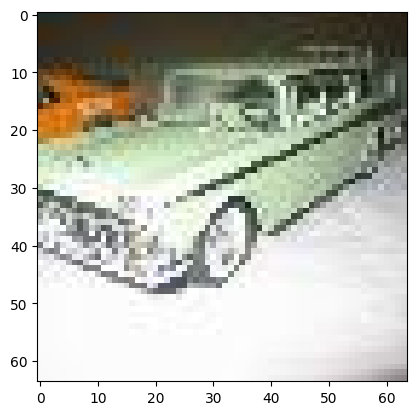

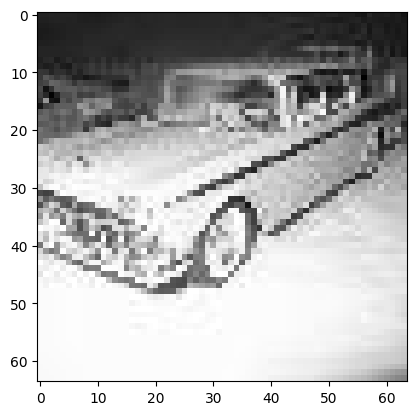

In [9]:
new_image_path = list(images_path.values())[random.randrange(0, len(carpetas)*n_imgs - 1)]
new_img = cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.show()
gray_im = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_im, cmap='gray')
plt.show()

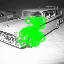

In [10]:
from google.colab.patches import cv2_imshow

# Tu código para detectar keypoints y dibujarlos en la imagen

# Crea un objeto ORB
orb = cv2.ORB_create(edgeThreshold=20)

# Detecta keypoints
keypoints = orb.detect(gray_im, None)

# Calcula los descriptores
keypoints, descriptors = orb.compute(gray_im, keypoints)

image_with_keypoints = cv2.drawKeypoints(gray_im, keypoints, None, color=(0, 255, 0), flags=0)

# Muestra la imagen con los keypoints
cv2_imshow( image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
len(descriptors[0])

32

La función devuelve una matriz de valores de esquina que indica la medida de la respuesta de Harris en cada píxel de la imagen de entrada.

La matriz devuelta por cv2.cornerHarris() tendrá el mismo tamaño que la imagen de entrada y contendrá valores que representan la medida de la esquina en cada píxel. Los valores más altos en esta matriz indican las regiones de la imagen donde se encuentran las esquinas.

En este caso devuelve una matriz de 64 valores.

## Aplicamos el detector de esquinas HARRIS a todas nuestras imagenes

In [58]:
if os.path.exists('ORB_descriptors.npy'):
    corners = np.load('ORB_descriptors.npy')
else:

    corners = np.empty((0,34))

    orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2, nlevels=8, edgeThreshold=10)
    for idx in images_path:

        gray_im = cv2.cvtColor(cv2.imread(images_path[idx]), cv2.COLOR_BGR2GRAY)        # Detecta los keypoints en la imagen
        keypoints = orb.detect(gray_im, None)
        # Extrae los descriptores de los keypoints
        _, descriptors = orb.compute(gray_im, keypoints)
        #descriptors= np.float32(descriptors)
        if np.any(descriptors):
            # Agrega información de carpeta y número de imagen a los descriptores
            descriptors = np.insert(descriptors, 0, idx[1], axis=1)
            descriptors = np.insert(descriptors, 0,idx[0] , axis=1)
            corners = np.vstack([corners, descriptors])


    np.save('ORB_descriptors', corners)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195


AxisError: ignored

In [28]:
corners.shape

(0, 34)

In [27]:
corners[34]

IndexError: ignored

## Entrenamos KNN

In [15]:
n_neighbors = 1000
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto', metric='hamming')

descriptors_train = corners[:, 2:] #Quitamos los dos primeros pertenecientes a indices de la imagen
knn.fit(descriptors_train)

NearestNeighbors(metric='hamming', n_neighbors=1000)

## Obtenemos las imagenes más similares a una nueva imagen

In [17]:
counts = {}

new_image_path = list(images_path.values())[random.randrange(0, len(carpetas)*n_imgs - 1)]
new_img = cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB)
gray_im_new = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2, nlevels=8, edgeThreshold=10)
keypoints = orb.detect(gray_im_new, None)
# Extrae los descriptores de los keypoints
_, descriptors = orb.compute(gray_im_new, keypoints)
new_corners = descriptors

for descriptor in new_corners:
    descriptor = descriptor.reshape(1, -1)
    distance, indice = knn.kneighbors(descriptor, n_neighbors=100)
    for idx in indice[0]:
        carpeta = str(int(corners[idx,0]))
        num_img = str(int(corners[idx,1]))
        id = (carpeta, num_img)
        if id in counts:
            counts[id] += 1
        else:
            counts[id] = 1

In [ ]:
print(counts)

{('184', '89'): 4, ('130', '61'): 5, ('108', '2'): 16, ('170', '13'): 1, ('15', '20'): 5, ('190', '27'): 11, ('254', '80'): 4, ('239', '99'): 13, ('72', '99'): 11, ('130', '93'): 17, ('184', '43'): 10, ('86', '86'): 16, ('169', '83'): 14, ('111', '10'): 12, ('69', '27'): 11, ('190', '14'): 8, ('190', '29'): 23, ('239', '98'): 8, ('254', '45'): 5, ('120', '69'): 7, ('133', '30'): 14, ('169', '9'): 18, ('69', '18'): 34, ('120', '56'): 9, ('30', '48'): 6, ('254', '29'): 6, ('69', '76'): 24, ('69', '37'): 24, ('86', '42'): 33, ('130', '90'): 19, ('30', '12'): 12, ('69', '80'): 28, ('133', '14'): 11, ('72', '67'): 11, ('108', '53'): 9, ('169', '27'): 19, ('15', '70'): 9, ('184', '79'): 26, ('239', '79'): 8, ('239', '21'): 10, ('129', '74'): 12, ('108', '14'): 7, ('129', '49'): 12, ('120', '75'): 4, ('239', '88'): 15, ('69', '53'): 13, ('184', '97'): 23, ('120', '23'): 5, ('120', '27'): 4, ('190', '74'): 10, ('86', '73'): 28, ('254', '10'): 7, ('86', '95'): 9, ('184', '21'): 9, ('184', '78')

KeyError: ignored

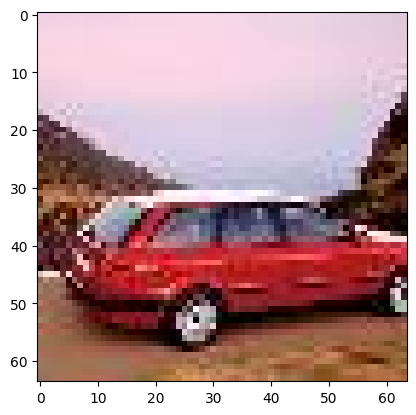

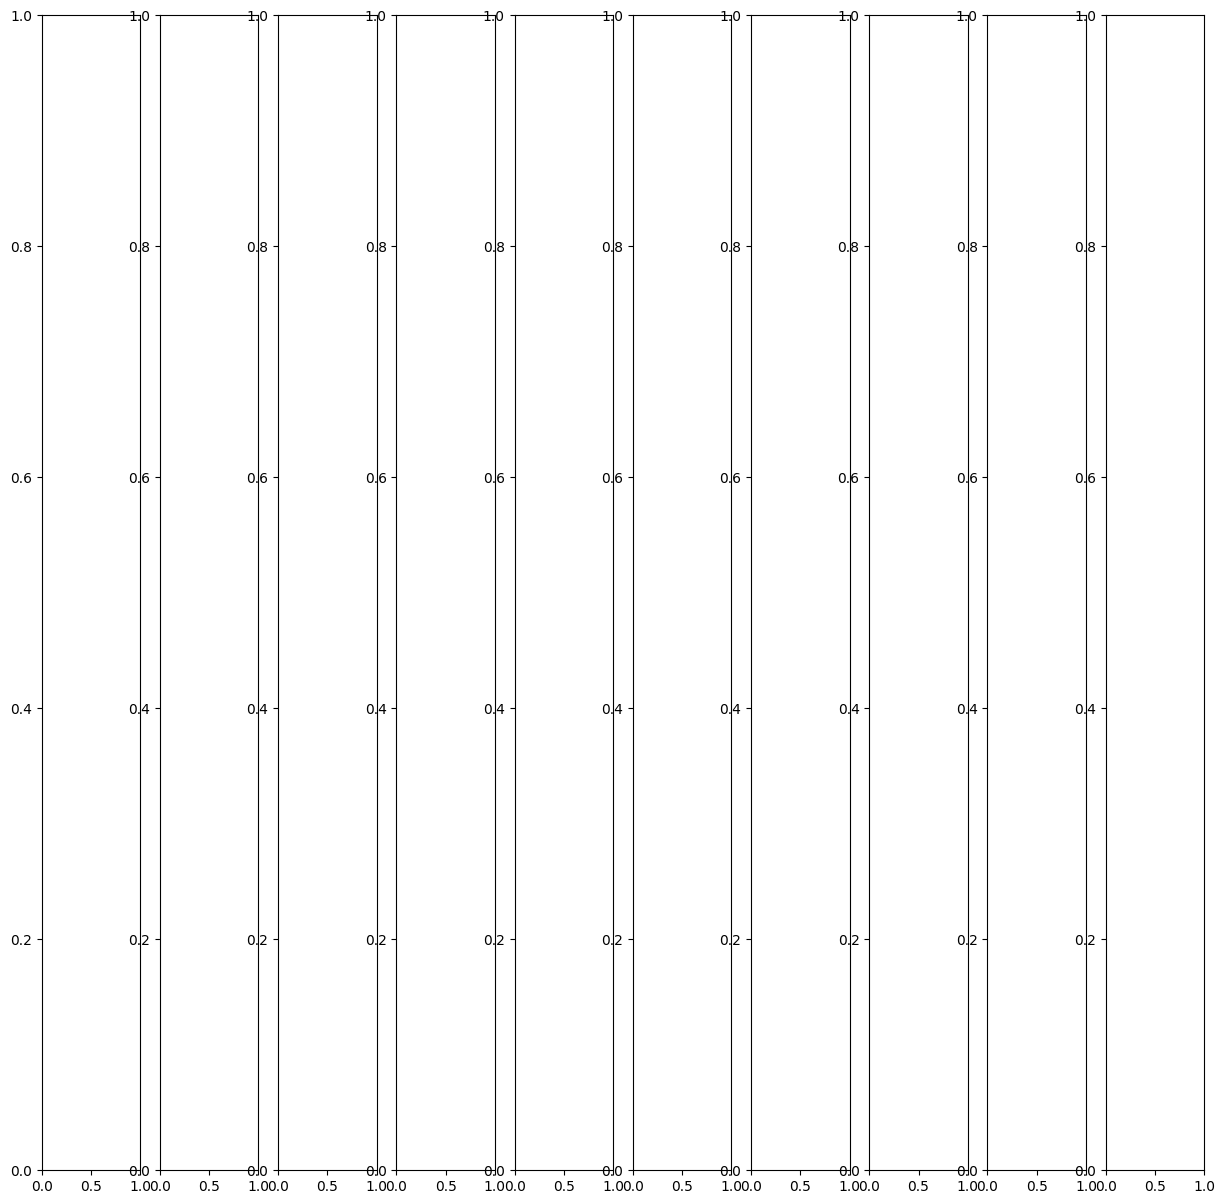

In [18]:
plt.imshow(new_img)
idx_similar = get_n_similar(10, counts, 1)
display_n_similar(idx_similar, 10)